You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

In [71]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [49]:
#import and consolidate data into single dataframe
files = glob.glob("states*.csv")
df_list = []
for i in files:
    data = pd.read_csv(i)
    df_list.append(data)
us_census = pd.concat(df_list)

In [57]:
#wrangle the "Income" column by removing $ symbol and changing to numeric data type to enable further analysis
us_census["Income"] = us_census["Income"].replace("[\$,]","", regex=True)
us_census["Income"] = pd.to_numeric(us_census["Income"])

In [50]:
#wrangle the "GenderPop" column by removing "_" symbol, splittimg the column into two - "Male" & "Female"
pop_split = us_census["GenderPop"].str.split("_")
us_census["Male"] = pop_split.str.get(0)
us_census["Female"] = pop_split.str.get(1)

   Unnamed: 0    State  TotalPop             Hispanic             White  \
0           0  Alabama   4830620  3.7516156462584975%  61.878656462585%   

                Black               Native                Asian  \
0  31.25297619047618%  0.4532312925170065%  1.0502551020408146%   

                Pacific              Income          GenderPop      Male  \
0  0.03435374149659865%  $43296.35860306644  2341093M_2489527F  2341093M   

     Female  
0  2489527F  


In [201]:
#rearrange columns of the dataframe
us_census = us_census[["State","TotalPop","Hispanic","White","Black","Native","Asian","Pacific","Income","Male","Female"]]

In [200]:
#wrangle newly created "Male" & "Female" columns by removing trailing letters and converting to numric values
us_census["Male"] = us_census["Male"].replace("M","", regex=True)
us_census["Male"] = pd.to_numeric(us_census["Male"])
us_census["Female"] = us_census["Female"].replace("F","", regex=True)
us_census["Female"] = pd.to_numeric(us_census["Female"])
us_census = us_census[["State","TotalPop","Hispanic","White","Black","Native","Asian","Pacific","Income","Male","Female"]]
print(us_census.head(1))

     State  TotalPop  Hispanic      White      Black    Native     Asian  \
0  Alabama   4830620  3.751616  61.878656  31.252976  0.453231  1.050255   

    Pacific        Income     Male   Female  
0  0.034354  43296.358603  2341093  2489527  


In [204]:
#removing duplicate rows, checking for NaN values.
us_census = us_census.drop_duplicates()
print(us_census["Male"].isnull().sum())
print(us_census["Female"].isnull().sum())
print(us_census["Income"].isnull().sum())
us_census["Female"] = us_census["Female"].astype(int) #converting olumn to int as it is easier to read 
print(us_census["Female"].dtype) #verifying successful conversion

0
0
0
int32


In [205]:
#wrangling remaining columns to suitable datatypes, removing "%" symbols.
us_census["Hispanic"] = us_census["Hispanic"].replace("[\%,]","", regex=True)
us_census["Hispanic"] = pd.to_numeric(us_census["Hispanic"])
us_census["White"] = us_census["White"].replace("[\%,]","", regex=True)
us_census["White"] = pd.to_numeric(us_census["White"])
us_census["Black"] = us_census["Black"].replace("[\%,]","", regex=True)
us_census["Black"] = pd.to_numeric(us_census["Black"])
us_census["Native"] = us_census["Native"].replace("[\%,]","", regex=True)
us_census["Native"] = pd.to_numeric(us_census["Native"])
us_census["Pacific"] = us_census["Pacific"].replace("[\%,]","", regex=True)
us_census["Pacific"] = pd.to_numeric(us_census["Pacific"])
us_census["Asian"] = us_census["Asian"].replace("[\%,]","", regex=True)
us_census["Asian"] = pd.to_numeric(us_census["Asian"])
print(us_census.dtypes) #verifying datatypes

     State  TotalPop  Hispanic      White      Black    Native     Asian  \
0  Alabama   4830620  3.751616  61.878656  31.252976  0.453231  1.050255   

    Pacific        Income     Male   Female  
0  0.034354  43296.358603  2341093  2489527  
State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male          int64
Female        int32
dtype: object


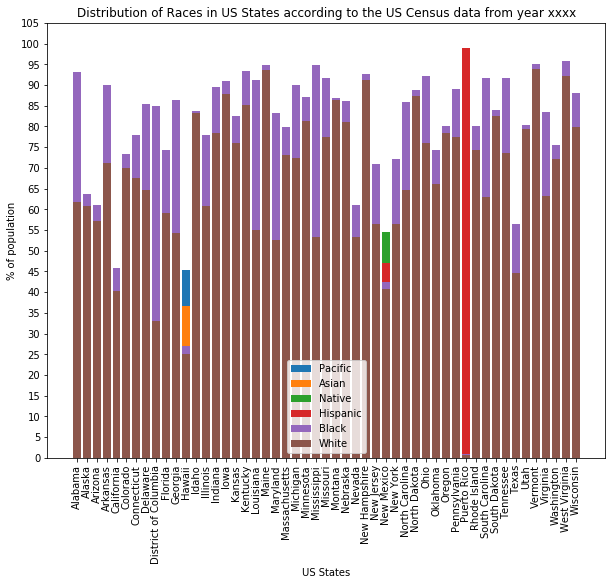

'\n#plt.subplot(611)\nplt.hist(us_census["Hispanic"], range=(0,50), bins =50, alpha =0.2)\nplt.hist(us_census["White"], range=(0,50), bins =50,alpha =0.2)\nplt.hist(us_census["Black"], range=(0,50), bins =50,alpha =0.2)\nplt.hist(us_census["Native"], range=(0,50), bins =50,alpha =0.2)\nplt.hist(us_census["Asian"], range=(0,50), bins =50,alpha =0.2)\nplt.hist(us_census["Pacific"], range=(0,50), bins =50,alpha =0.2)\nplt.xticks(range(0,51),us_census["State"], rotation=45)\n#plt.subplot(612)\n#plt.subplot(613)\n#plt.subplot(614)\n#plt.subplot(615)\n#plt.subplot(616)\n'

In [209]:
#creating stacked barplot
plt.figure(figsize = (10,8))
plt.bar(us_census["State"], us_census["Pacific"], bottom=us_census["Asian"], label="Pacific")
plt.bar(us_census["State"], us_census["Asian"], bottom=us_census["Native"], label="Asian")
plt.bar(us_census["State"], us_census["Native"], bottom=us_census["Hispanic"], label="Native")
plt.bar(us_census["State"], us_census["Hispanic"], bottom=us_census["Black"], label="Hispanic")
plt.bar(us_census["State"], us_census["Black"], bottom=us_census["White"], label="Black")
plt.bar(us_census["State"], us_census["White"], label="White")

plt.title("Distribution of Races in US States according to the US Census data from year xxxx")
plt.xlabel("US States")
plt.ylabel("% of population")
plt.yticks(range(0,110,5))
plt.xticks(rotation=90)
plt.legend(loc = 8)
plt.show()
#Originally it was suggested to create histograms to visualise the dataset, but I though that a stacked barplot would be 
#more appropriate. 
'''
#plt.subplot(611)
plt.hist(us_census["Hispanic"], range=(0,50), bins =50, alpha =0.2)
plt.hist(us_census["White"], range=(0,50), bins =50,alpha =0.2)
plt.hist(us_census["Black"], range=(0,50), bins =50,alpha =0.2)
plt.hist(us_census["Native"], range=(0,50), bins =50,alpha =0.2)
plt.hist(us_census["Asian"], range=(0,50), bins =50,alpha =0.2)
plt.hist(us_census["Pacific"], range=(0,50), bins =50,alpha =0.2)
plt.xticks(range(0,51),us_census["State"], rotation=45)
#plt.subplot(612)
#plt.subplot(613)
#plt.subplot(614)
#plt.subplot(615)
#plt.subplot(616)
'''

Based on the above chart I can conclude that the dataset is not complete as bars for some states are less than 50% long and bars for all states, except Puerto Rico are less than 50% long. 

I am not yet familiar with methodologies used for US census data gathering, therefore I cannot comment with absolute certainty whether or not given dataset is sufficient to paint bigger picture correctly. 

Yesterday I learned about Central Limit Theorem. Based on what I learned, I would suggest that it is possible to calculate and fill in missing information using the Central Limit Theorem.